In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests 
import os
%matplotlib inline

In [2]:
urls_list = ['https://inshorts.com/en/read/world' ,
            'https://inshorts.com/en/read/india' ,
            'https://inshorts.com/en/read/sports' , 
            'https://inshorts.com/en/read/business']
## getting the url  of the news section for which we will collect data to analyse

In [3]:
def datasetprepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1] # category of news
        data = requests.get(url) ## article
        soup = BeautifulSoup(data.content , 'html.parser')
        news_articles = [{'news_headline' : headline.find('span' ,attrs = {"itemprop" : "headline"}).string,
                         'news_article' : article.find('div' ,attrs = {"itemprop" : "articleBody"}).string , 
                         'news_category' : news_category}
                        for headline , article in
                        zip(soup.find_all('div' , class_ = ["news-card-title news-right-box"]),
                          soup.find_all('div' , class_ = ["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
    df = pd.DataFrame(news_data)
    df = df[['news_headline' , 'news_article' , 'news_category']]
    return df
        

In [6]:
news_df = datasetprepare(urls_list)  ### here we fot our news into our data frame 


In [7]:
news_df.info()
## here we got 87 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
news_headline    87 non-null object
news_article     87 non-null object
news_category    87 non-null object
dtypes: object(3)
memory usage: 2.2+ KB


In [8]:
## lets checkout our Dataset
news_df.head(5)


,news_headline,news_article,news_category
0,Which countries have stopped AstraZeneca's COV...,Over 20 countries have suspended the use of As...,world
1,New coronavirus variant found in France,A new coronavirus variant has been found in th...,world
2,Facebook to pay Rupert Murdoch's News Corp for...,Facebook has reached a three-year deal to pay ...,world
3,Japanese govt employees punished with pay cut ...,A number of Japanese government employees at t...,world
4,'Amityville Horror' convicted killer dies aged...,"Ronald DeFeo, the convicted killer who murdere...",world


In [9]:
news_df[news_df['news_category']== 'india']['news_headline'].count()
## we got 12 news from india

12

In [10]:
news_df[news_df['news_category']== 'india']['news_headline']

25    Afghanistan wins SAFF title, spoils India's ha...
26       Zimbabwe players ask India for cricketing tips
27    Nigerian weightlifter in dope net, India may gain
28      Samsung launches Galaxy Star 2 Plus at Rs.7,335
29    Indian Navy gets VLF, easy communication with ...
30                    Oldest woman in India passes away
31    AAP drops Rajouri Garden candidate, a week bef...
32                    Kashmir's famous Dal Lake freezes
33                    Bharti Airtel rakes in 61% profit
34         India beat NZ 3-2 to enter CWG hockey finals
35               India's first Billiards Premier League
36            Infosys Gifts Sikka Shares Worth Rs 8.2cr
Name: news_headline, dtype: object

In [11]:
## lets check out the number of news  in each  category 
news_df .news_category.value_counts()

sports      25
world       25
business    25
india       12
Name: news_category, dtype: int64

## Text Wrangling and Pre- processing 

In [12]:
import spacy
import nltk 
## spacy is the library for text wrangling which is build upon nltk 
from nltk .tokenize.toktok import ToktokTokenizer
import re # regular expression
import unicodedata
## it is defined by incode Standard Annex 
# which defines  the character properties for all 
# unicode characters 

In [13]:
## now creating the stop word list and  using this list we will 
# eliminate the words which are occuring most frequently 

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
## no , not can not be treated as regular stop words as we are
# analysing news , and these cant be treated as regular stopwords
 

In [14]:
stopword_list ## these are our stopword list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removal HTML tags

In [15]:
##!pip install spacy==2.3.5

  Using cached spacy-2.3.5-cp37-cp37m-win_amd64.whl (9.5 MB)
  Using cached srsly-1.0.5-cp37-cp37m-win_amd64.whl (176 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached thinc-7.4.5-cp37-cp37m-win_amd64.whl (888 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.0
    Uninstalling srsly-2.4.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\srsly-2.4.0.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.



In [16]:
# we often see the links inside the news articles , hence its necessay to remve these html tags

In [17]:
def strip_html_tags(text):
    soup  = BeautifulSoup(text , "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
## exapmle
strip_html_tags('<html><h2>Some important text </h2></html>')

'Some important text '

## Removal accdented character 

In [18]:
## sometime we look at accented character like some french character 
def remove_accented_chars(text):
    
    
    text = unicodedata.normalize("NFKD" , text ).encode('ascii' , 'ignore').decode('utf-8' , 'ignore')
    return text
## lets check the function 
remove_accented_chars('śōṁē Āccented ṭēxṭ')

'some Accented text'

## Removal of special character

In [19]:
## now with the help of  regular wxpression we will remove special character

In [20]:
def remove_special_characters(text  , remove_digits = False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern , '' , text )
    return text

In [21]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [22]:
## LEMMATIZATION 
# PROCESS OF FINDING THE ROOT WORD WITH THEIR  DICTIONARY MEANING

In [23]:
nlp = spacy.load("en_core_web_sm")

In [24]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text ])
    return text 

In [25]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

## Remove Stopwords

In [26]:
def remove_stopwords(text  , is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens ]
    if is_lower_case :
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else :
        filtered_tokens = [token for token  in tokens if token.lower() not in stopword_list]
    filtered_text  = ' '.join (filtered_tokens)
    return filtered_text
## lets check our function 
remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text Normalizer 


In [27]:
## here we are bulding a funtion  which can do all the preprocessing ina single step 
## we will  be calling out multiple function inside this function 

In [28]:
def normalize_corpus(corpus , html_stripping =True , contraction_expansion = True ,
                    accented_char_removal = True , text_lower_case = True ,
                    text_lemmatization = True , special_char_removal = True ,
                    stopword_removal = True , remove_digits = True ):
    normalized_corpus = []
    #normalizing ezch document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        #lowercase the text
        if text_lower_case :
            doc = doc.lower()
        #removing extra newlines 
        doc = re.sub(r'[\r|\n|\r\n]+' , ' ', doc)
        #lemmatize text , converting to root word
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and \or digits
        if special_char_removal:
            
            # insert spaces between special characters and \ or digits
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub('\\1' , doc)
            doc = remove_special_characters(doc , remove_digits  = remove_digits)
        # remove extra whitespace
        doc = re.sub(' +' , ' ', doc)
        #remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc , is_lower_case = text_lower_case)
        normalized_corpus.append(doc)
        
    return normalized_corpus
        
        
        

## Pre-process and normalize news articles

In [29]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [30]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'New coronavirus variant found in France. A new coronavirus variant has been found in the French region of Brittany, said the French health ministry. It added that initial analysis did not show this new variant to be more serious or transmissible than others. The French health ministry said the new variant had been found in a cluster of cases in a hospital centre in Lannion.',
 'clean_text': 'new coronavirus variant find france new coronavirus variant find french region brittany say french health ministry add initial analysis not show new variant serious transmissible french health ministry say new variant find cluster case hospital centre lannion'}

In [31]:
news_df

,news_headline,news_article,news_category,full_text,clean_text
0,Which countries have stopped AstraZeneca's COV...,Over 20 countries have suspended the use of As...,world,Which countries have stopped AstraZeneca's COV...,country stop astrazeneca covid vaccine blood c...
1,New coronavirus variant found in France,A new coronavirus variant has been found in th...,world,New coronavirus variant found in France. A new...,new coronavirus variant find france new corona...
2,Facebook to pay Rupert Murdoch's News Corp for...,Facebook has reached a three-year deal to pay ...,world,Facebook to pay Rupert Murdoch's News Corp for...,facebook pay rupert murdoch news corp content ...
3,Japanese govt employees punished with pay cut ...,A number of Japanese government employees at t...,world,Japanese govt employees punished with pay cut ...,japanese govt employee punish pay cut leave wo...
4,'Amityville Horror' convicted killer dies aged...,"Ronald DeFeo, the convicted killer who murdere...",world,'Amityville Horror' convicted killer dies aged...,amityville horror convict killer die aged cust...
...,...,...,...,...,...
82,PhonePe increases lead over Google Pay with 42...,As per data released by the National Payments ...,business,PhonePe increases lead over Google Pay with 42...,phonepe increase lead google pay upi market sh...
83,Govt releases entire ₹1.10 lakh cr estimated G...,Finance Ministry on Monday released the 20th i...,business,Govt releases entire ₹1.10 lakh cr estimated G...,govt release entire lakh cr estimate gst short...
84,Protests outside POSCO's Maharashtra steel pla...,Protests outside South Korean steelmaker POSCO...,business,Protests outside POSCO's Maharashtra steel pla...,protest outside posco maharashtra steel plant ...
85,Indiabulls sells YES Bank Co-founder's Delhi p...,Indiabulls Housing Finance has sold a property...,business,Indiabulls sells YES Bank Co-founder's Delhi p...,indiabull sell yes bank co founder delhi prope...


## saving the news arrticles 

In [32]:
news_df.to_csv('news.csv' , index = False  ,  encoding = 'utf-8')

## tagging part of speech 

In [33]:
news_df =  pd.read_csv('news.csv')

In [34]:
corpus = normalize_corpus(news_df['full_text'] , text_lower_case = False ,
                         text_lemmatization = False , special_char_removal = False)
## this code is for crating the corpus  for sentiment analysis
sentence = str(news_df.iloc[1] .news_headline)
sentence_nlp = nlp(sentence)


In [35]:
## part of speech for single sentence
spacy_pos_tagged = [(word , word.tag_ , word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged ,columns = ['Word' , 'POS tag' , 'Tag type'])

,Word,POS tag,Tag type
0,New,JJ,ADJ
1,coronavirus,NN,NOUN
2,variant,NN,NOUN
3,found,VBN,VERB
4,in,IN,ADP
5,France,NNP,PROPN


In [36]:
### same thing we can do with nltk

In [37]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [38]:
pd.DataFrame(nltk_pos_tagged , columns = ['Word' , 'POS tag'])

,Word,POS tag
0,New,NNP
1,coronavirus,NN
2,variant,NN
3,found,VBN
4,in,IN
5,France,NNP


## Emotion and Sentiment Analysis

In [39]:
from afinn import Afinn

In [40]:
af = Afinn()

In [41]:
sentiment_score = [af.score(article) for article in corpus]

In [42]:
sentiment_score

[-4.0,
 0.0,
 -3.0,
 -11.0,
 -13.0,
 6.0,
 -1.0,
 -1.0,
 -6.0,
 -3.0,
 -16.0,
 -4.0,
 2.0,
 -1.0,
 -6.0,
 -7.0,
 -10.0,
 5.0,
 -20.0,
 -26.0,
 1.0,
 8.0,
 0.0,
 -7.0,
 -7.0,
 5.0,
 6.0,
 6.0,
 5.0,
 4.0,
 0.0,
 -7.0,
 3.0,
 11.0,
 4.0,
 4.0,
 6.0,
 -1.0,
 11.0,
 0.0,
 10.0,
 8.0,
 -1.0,
 1.0,
 5.0,
 -4.0,
 4.0,
 0.0,
 9.0,
 11.0,
 4.0,
 0.0,
 6.0,
 -4.0,
 -4.0,
 -4.0,
 0.0,
 9.0,
 9.0,
 -4.0,
 6.0,
 -1.0,
 -4.0,
 -4.0,
 0.0,
 -2.0,
 4.0,
 -4.0,
 7.0,
 3.0,
 -1.0,
 0.0,
 -3.0,
 10.0,
 -6.0,
 -26.0,
 3.0,
 3.0,
 -6.0,
 5.0,
 2.0,
 4.0,
 -1.0,
 0.0,
 -10.0,
 5.0,
 -1.0]

In [43]:
## creating the sentiment category 
sentiment_category = ['posetive' if score >0
                      else 'negative'  if score <0
                        else 'neutral'
                      for score in sentiment_score]

In [44]:
df = pd.DataFrame([list(news_df['news_category']) ,sentiment_score , sentiment_category]).T

In [45]:
df

,0,1,2
0,world,-4,negative
1,world,0,neutral
2,world,-3,negative
3,world,-11,negative
4,world,-13,negative
...,...,...,...
82,business,-1,negative
83,business,0,neutral
84,business,-10,negative
85,business,5,posetive


In [46]:
df.columns = ['news_category' , 'sentiment_score' , 'sentiment_category']

In [47]:
df

,news_category,sentiment_score,sentiment_category
0,world,-4,negative
1,world,0,neutral
2,world,-3,negative
3,world,-11,negative
4,world,-13,negative
...,...,...,...
82,business,-1,negative
83,business,0,neutral
84,business,-10,negative
85,business,5,posetive


In [48]:
df['sentiment_score']  = df.sentiment_score.astype('float')

In [49]:
df.groupby(by = ['news_category']).describe()

sentiment_score                                                
                        count      mean       std   min   25%  50%  75%   max
news_category                                                                
business                 25.0 -0.880000  6.936137 -26.0 -4.00  0.0  3.0  10.0
india                    12.0  3.916667  4.273775  -7.0  3.75  4.5  6.0  11.0
sports                   25.0  2.800000  5.267827  -4.0 -1.00  1.0  8.0  11.0
world                    25.0 -4.960000  7.929271 -26.0 -7.00 -4.0  0.0   8.0

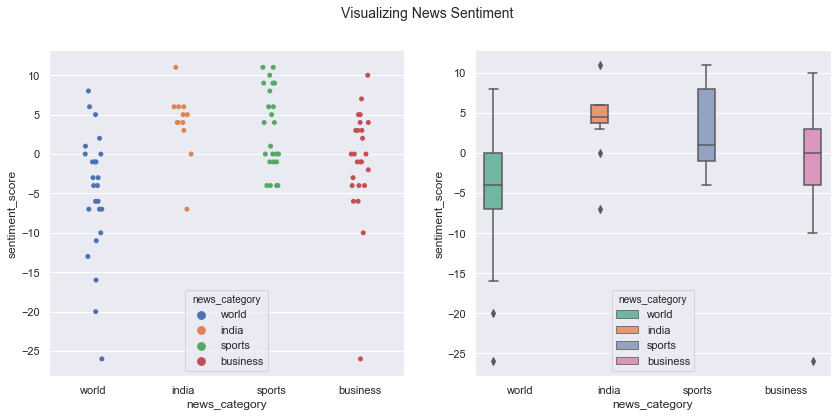

In [50]:
fig , (ax1 ,ax2) = plt.subplots(1,2 , figsize = (14,6))
sp  = sns.stripplot(x = 'news_category' , y = 'sentiment_score' , hue = 'news_category' , data = df , ax = ax1 )
bp  = sns.boxplot(x = 'news_category'  , y = 'sentiment_score' ,  hue = 'news_category'  , data = df , palette = 'Set2' , ax =ax2 )
t = fig.suptitle('Visualizing News Sentiment' , fontsize =14)


In [51]:
## here we can see  world has mostly  the negative news  , india has mostly the posetive news  
#, bussiness on the other hand is neutral 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


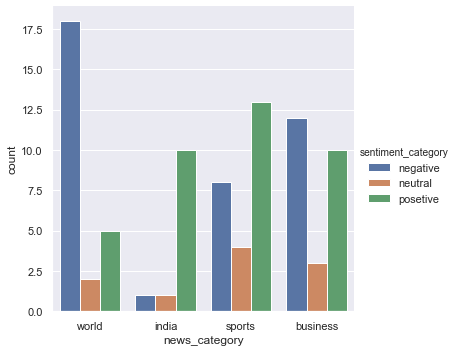

In [52]:
fc = sns.factorplot(x = 'news_category' , hue = 'sentiment_category', 
                    data =df  , kind = 'count' ) 
plt.show()

In [53]:
pos_idx = df[(df.news_category == 'world') & (df.sentiment_score>0.)].index[0]
neg_idx = df[(df.news_category == 'world') & (df.sentiment_score<-0.)].index[0]

print('Most negative world news article :' , news_df.iloc[neg_idx][['news_article']][0])
print()

print('Most posetive world news article :' , news_df.iloc[pos_idx][['news_article']][0])

Most negative world news article : Over 20 countries have suspended the use of AstraZeneca's COVID-19 vaccine over fears the shot may have caused blood clots in some recipients. Sweden and Latvia on Tuesday became the latest nations to halt the rollout. Other countries include: Germany, Italy, France, Spain, Denmark, Norway, Luxembourg, Cyprus, Portugal, Slovenia, Indonesia, Ireland, Bulgaria, Congo, Thailand, Romania and Austria.

Most posetive world news article : China has said it'll be donating 3,00,000 coronavirus vaccine doses to UN peacekeepers, with "priority given to the peacekeeping missions in Africa". "This is a further step to make China's vaccines a global public good and also a demonstration of China's...continuous support to the UN and multilateralism," it added. Last month, India pledged two lakh vaccine doses for UN peacekeepers. 


In [54]:
## for india we can  do the same 

In [57]:
pos_idx = df[(df.news_category =='business')&(df.sentiment_score >0.)].index[0]
neg_idx = df[(df.news_category =='business')&(df.sentiment_score <-0.)].index[0]

print('Most negative business news article :' , news_df.iloc[neg_idx][['news_article']][0])
print()

print('Most posetive business news article :' , news_df.iloc[pos_idx][['news_article']][0])

Most negative business news article : Mahindra Group Chairman Anand Mahindra took to Twitter to voice his concern about the rising COVID-19 cases in Maharashtra and said, "Maharashtra needs emergency permission to vaccinate every willing person." "The state is the nerve-centre of the country's economic activity and more lockdowns will be debilitating," he added. The state recorded over 16,000 cases on Sunday, the highest this year.

Most posetive business news article : Railways Minister Piyush Goyal on Tuesday said in the Lok Sabha that Indian Railways will never be privatised. "It is a property of every Indian and will remain so," he said, adding that it will remain with the Government of India. However, he also said that private investment in Railways should be welcomed as it will improve services.


In [58]:
pos_idx = df[(df.news_category =='india')&(df.sentiment_score >0.)].index[0]
neg_idx = df[(df.news_category =='india')&(df.sentiment_score <-0.)].index[0]

print('Most negative indian news article :' , news_df.iloc[neg_idx][['news_article']][0])
print()

print('Most posetive indian news article :' , news_df.iloc[pos_idx][['news_article']][0])

Most negative indian news article : Only a week before Delhi Assembly polls, Aam Aadmi Party on Tuesday dropped its candidate, PS Saluja, from Rajouri Garden constituency after finding a criminal case against him. AAP said that since last date for withdrawal of names was over, so "Saluja can't be withdrawn officially, but he’s not a party candidate anymore and we are leaving the seat vacant".

Most posetive indian news article : Afghanistan won their maiden-SAFF Football Championship after defeating India 2-0 in the finals at Kathmandu and spoilt India's bid to win a hat-trick of SAFF-trophies. Mustafa Azadzoy(8th-minute) and Sanjar Ahmadi(63rd-minute) scored goals for Afghans, who lost championship to India 0-4 in New Delhi two-years back. From Indian-side, Robin Singh and Jeje Lalpeklhua were praiseworthy but couldn't save India from defeat.
